<a href="https://colab.research.google.com/github/Sathush3/FolierDiseasePrediction/blob/main/FolierDiseaseDtectionOnAppleLeaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
from re import search 
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd "/content/drive/MyDrive/Colab Notebooks/Folier_Disease"

/content/drive/MyDrive/Colab Notebooks/Folier_Disease


In [5]:
ls

 models/           'Original dataset'/   test.csv   train.csv
'models\apple.h5'   test/                train/


In [6]:
DIR=r'Original dataset'

In [7]:
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

In [11]:
test.head()

,image_id
0,Test_0
1,Test_1
2,Test_2
3,Test_3
4,Test_4


In [12]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


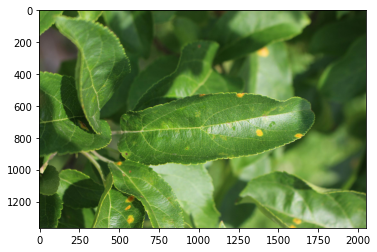

In [8]:
image1=Image.open(r'Original dataset/Test_0.jpg')
plt.imshow(image1)
plt.show()

# Prepare training data 

In [9]:
class_names=train.loc[:,'healthy':].columns
print(class_names)

Index(['healthy', 'multiple_diseases', 'rust', 'scab'], dtype='object')


In [10]:
number=0
train['label']=0
for i in class_names:
    train['label']=train['label'] + train[i]* number
    number=number+1

In [ ]:
train

,image_id,healthy,multiple_diseases,rust,scab,label
0,Train_0,0,0,0,1,3
1,Train_1,0,1,0,0,1
2,Train_2,1,0,0,0,0
3,Train_3,0,0,1,0,2
4,Train_4,1,0,0,0,0
...,...,...,...,...,...,...
1816,Train_1816,0,0,0,1,3
1817,Train_1817,1,0,0,0,0
1818,Train_1818,1,0,0,0,0
1819,Train_1819,0,0,1,0,2


In [ ]:
def get_label_img(img):
    if search("Train",img):
        img=img.split('.')[0]
        label=train.loc[train['image_id']==img]['label']
        return label
         
        

In [ ]:
shutil.os.mkdir(r'train')
shutil.os.mkdir(r'train/healthy')
shutil.os.mkdir(r'train/multiple_disease')
shutil.os.mkdir(r'train/rust')
shutil.os.mkdir(r'train/scab')
shutil.os.mkdir(r'test')


In [ ]:
def create_train_data():
    images=natsort.natsorted(os.listdir(DIR))
    for img in tqdm(images):
        label=get_label_img(img)
        path=os.path.join(DIR,img)
        
        if search("Train",img):
            if(img.split("_")[1].split(".")[0]) and label.item()==0:
                shutil.copy(path,r'train/healthy')
            elif(img.split("_")[1].split(".")[0]) and label.item()==1:
                shutil.copy(path,r'train/multiple_disease')
            elif(img.split("_")[1].split(".")[0]) and label.item()==2:
                shutil.copy(path,r'train/rust')
            elif(img.split("_")[1].split(".")[0]) and label.item()==3:
                shutil.copy(path,r'train/scab')   
        elif search("Test",img):
            shutil.copy(path,r'test')

In [ ]:
train_dir=create_train_data()


 54%|█████▍    | 1983/3652 [00:29<00:26, 63.67it/s]

ValueError: ignored

# Data Preprocessing

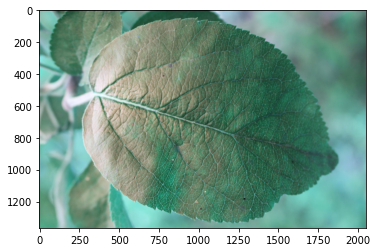

In [11]:
train_DIR=r'train'
Categories=['healthy','multiple_disease','rust','scab']


for j in Categories:
    path=os.path.join(train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break
        
    
    



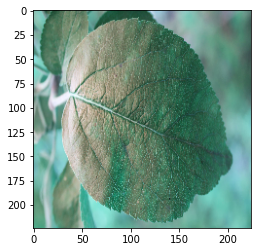

In [12]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

# Model Preparation

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 validation_split=0.2)

train_datagen=datagen.flow_from_directory(r'train',
                                            target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='training' )
val_datagen=datagen.flow_from_directory(r'train',
                                            target_size=(IMG_SIZE,IMG_SIZE),
                                          batch_size=16,
                                          class_mode='categorical',
                                          subset='validation' )

Found 1458 images belonging to 4 classes.
Found 363 images belonging to 4 classes.


# model with 0.59 accuracy

In [ ]:
# model=Sequential()
# model.add(Conv2D(64,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3),padding='same'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3),activation='relu',padding="same"))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3),activation='relu',padding="same"))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(128,(3,3),activation='relu',padding="same"))
# model.add(MaxPooling2D(2,2))
# model.add(Flatten())
# model.add(Dense(4,activation='softmax'))

# #compile the model

# model.compile(optimizer='Adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'],)
# model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 256)       295168    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 28, 28, 256)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 512)      

# model with 0.93 accuracy


In [15]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding="same"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

#compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'],)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [16]:
checkpoint=ModelCheckpoint(r'models/apple.h5',
                          monitor='val_loss',
                          mode='min',
                           save_best_only=True,
                           verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                        min_delta=0,
                        patience=10,
                       verbose=1,
                        restore_best_weights=True
                   )
callbacks=[checkpoint,earlystop]

In [17]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                  steps_per_epoch=train_datagen.samples//16,
                                  validation_steps=val_datagen.samples//16,
                                  callbacks=callbacks,
                                  
                                 )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
91/91 [==============================] - 945s 10s/step - loss: 1.2767 - accuracy: 0.3372 - val_loss: 1.2515 - val_accuracy: 0.3409

Epoch 00001: val_loss improved from inf to 1.25148, saving model to models/apple.h5
Epoch 2/30
91/91 [==============================] - 90s 991ms/step - loss: 1.2613 - accuracy: 0.3015 - val_loss: 1.2472 - val_accuracy: 0.3438

Epoch 00002: val_loss improved from 1.25148 to 1.24721, saving model to models/apple.h5
Epoch 3/30
91/91 [==============================] - 89s 982ms/step - loss: 1.2387 - accuracy: 0.3361 - val_loss: 1.2061 - val_accuracy: 0.4943

Epoch 00003: val_loss improved from 1.24721 to 1.20610, saving model to models/apple.h5
Epoch 4/30
91/91 [==============================] - 89s 978ms/step - loss: 1.0668 - accuracy: 0.5444 - val_loss: 0.7124 - val_accuracy: 0.7301

Epoch 00004: val_loss improved from 1.20610 to 0.71237, saving model to models/apple.h5
Epoch 5/30
91/91 [==============================] - 87s 962ms/step - loss: 0.

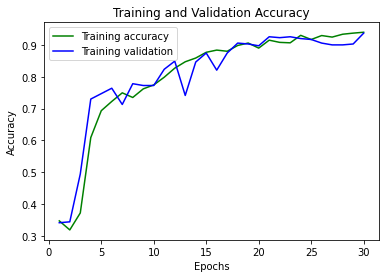

In [18]:
acc_train=model_history.history['accuracy']
acc_validation=model_history.history['val_accuracy']
epochs=range(1,31)
plt.plot(epochs,acc_train,'g',label='Training accuracy')
plt.plot(epochs,acc_validation,'b',label='Training validation')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

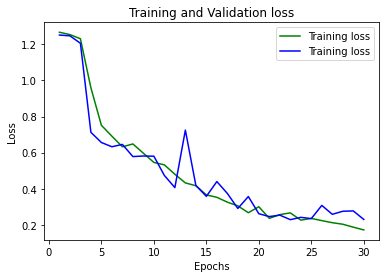

In [19]:
loss_train=model_history.history['loss']
loss_validation=model_history.history['val_loss']
epochs=range(1,31)
plt.plot(epochs,loss_train,'g',label='Training loss')
plt.plot(epochs,loss_validation,'b',label='Training loss')
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Making the prediction on single image

1


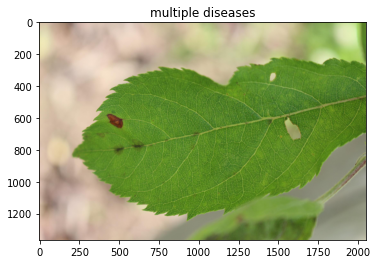

In [25]:
test_image=r'Original dataset/Train_62.jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=['healthy','multiple diseases','rust','scab']
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()


In [ ]:
test_image

array([[[[0.57254905, 0.7254902 , 0.5529412 ],
         [0.5803922 , 0.73333335, 0.56078434],
         [0.57254905, 0.73333335, 0.56078434],
         ...,
         [0.6509804 , 0.7647059 , 0.5372549 ],
         [0.6745098 , 0.76862746, 0.5254902 ],
         [0.6745098 , 0.76862746, 0.5254902 ]],

        [[0.5647059 , 0.7176471 , 0.54509807],
         [0.57254905, 0.7254902 , 0.5529412 ],
         [0.5686275 , 0.7294118 , 0.5568628 ],
         ...,
         [0.654902  , 0.77254903, 0.5294118 ],
         [0.67058825, 0.77254903, 0.5254902 ],
         [0.67058825, 0.77254903, 0.5254902 ]],

        [[0.5568628 , 0.70980394, 0.5372549 ],
         [0.5568628 , 0.70980394, 0.5372549 ],
         [0.5529412 , 0.7137255 , 0.5411765 ],
         ...,
         [0.654902  , 0.77254903, 0.52156866],
         [0.6627451 , 0.7764706 , 0.5254902 ],
         [0.6627451 , 0.7764706 , 0.5254902 ]],

        ...,

        [[0.6       , 0.6156863 , 0.5176471 ],
         [0.6       , 0.6156863 , 0.5176471 ]